#### EDA for sierraleone-bumbuna

### 1. Data Understansing and Data Preparation (Profiling And Cleaning)
** CRISP-DM PAHSE-1 Data Profiling

You cannot model what you don't understand
You can’t extract value from corrupted input.

In [67]:
# Import Libraries 
import sys
import os
sys.path.append(os.path.abspath(".."))

import pandas as pd 
import scipy 
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes



In [ ]:
# 1. Load dataset
df = pd.read_csv("../data/sierraleone-bumbuna.csv")
df.head(10)
# 2. Inital Overview:
df.info()
# Describe for numeric value:
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
unique,525600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-10-30 00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,NaN,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,NaN,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,NaN,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,NaN,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,NaN,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN


In [ ]:
# 3. Convert Time stamp to datetimedf[df]
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# 4. Drop Comments column since it is null
df.drop(columns='Comments', inplace=True)
# Show the data type after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

### 2. EDA 
Descriptive statistics, 
Cheking for 
 ** Anomalies
 ** Missing Value
 ** Outlier Detection
 ** Visualize the data
 ** Group Statistics  

In [14]:
# 2.1 Descriptive statistics for Numerical Value
df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,2022-04-30 12:00:30.000000768,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091
min,2021-10-30 00:01:00,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000
25%,2022-01-29 06:00:45,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000
50%,2022-04-30 12:00:30,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000
75%,2022-07-30 18:00:15,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000
max,2022-10-30 00:00:00,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000
std,NaN,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161


In [ ]:
# 2.2 .Display missing value count for each column
print("\nMissing Value Count per Column:")
missing_values = df.isna().sum()
print(missing_values)


Missing Value Count per Column:
Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64


In [16]:
# 2.3 Identifying columns with more than 5% null
total_rows = len(df)
columns_with_high_nulls = missing_values[missing_values > 0.05 * total_rows]

if not columns_with_high_nulls.empty:
    print("\nColumns with more than 5% nulls:")
    print(columns_with_high_nulls)
else:
    print('\n No Columns with more than 5% null')


 No Columns with more than 5% null


In [17]:
df.describe(include='all')

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,2022-04-30 12:00:30.000000768,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091
min,2021-10-30 00:01:00,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000
25%,2022-01-29 06:00:45,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000
50%,2022-04-30 12:00:30,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000
75%,2022-07-30 18:00:15,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000
max,2022-10-30 00:00:00,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000
std,NaN,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161


In [18]:
# 2.4 Outlier Detection
#“Noisy or extreme values distort averages, break models, and hide patterns.”
# Missing values = “silent sensors” (we don’t know what really happened)
# Outliers = “broken sensors” or “rare natural events”
# Mathematically, both increase variance, lower signal-to-noise ratio, and can lead to biased models.
# outlier detection in  
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH',  'WS', 'WSgust']
z_scores = df[cols].apply(zscore)
outlier_flags = (z_scores.abs() > 3)
outlier_summary = outlier_flags.sum()
print(outlier_summary)

GHI       2477
DNI       7586
DHI       2986
ModA      1604
ModB      2041
Tamb       192
RH        4929
WS        3967
WSgust    3665
dtype: int64


In [19]:

# 2.4 Replace Outliers with Median 

df_clean = df.copy()

for col in  ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH',  'WS', 'WSgust']:
    z = zscore(df_clean[col])
    median = df_clean[col].median()
    outliers = abs(z) > 3
    print(f"{col}: {outliers.sum()} outliers replaced")
    df_clean.loc[outliers, col] = median

GHI: 2477 outliers replaced
DNI: 7586 outliers replaced
DHI: 2986 outliers replaced
ModA: 1604 outliers replaced
ModB: 2041 outliers replaced
Tamb: 192 outliers replaced
RH: 4929 outliers replaced
WS: 3967 outliers replaced
WSgust: 3665 outliers replaced


In [21]:
# 2.5 Data Export
df_clean.to_csv("../data/sierraleone_clean.csv", index=False)

### 3. Time Serious Analysis

In [50]:
# load the clean data-set
df1 = pd.read_csv("../data/sierraleone_clean.csv")
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.00000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,196.44199,104.527217,110.109541,203.054922,193.719867,26.323664,80.117892,1.106696,1.644945,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091
std,291.23529,201.696328,154.170508,296.230534,283.124918,4.391019,19.515420,1.157374,1.509352,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161
min,-19.50000,-7.800000,-17.900000,0.000000,0.000000,13.200000,17.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000
25%,-2.80000,-0.300000,-3.800000,0.000000,0.000000,23.100000,69.500000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000
50%,0.30000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000
75%,353.90000,75.500000,220.400000,353.800000,338.500000,29.400000,96.700000,1.900000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000
max,1097.00000,772.300000,590.500000,1109.200000,1064.000000,39.500000,100.000000,4.800000,6.400000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000


In [53]:
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])


In [54]:
df1.set_index('Timestamp', inplace=True)

In [55]:
df1['Hour'] = df1.index.hour
df1['Month'] = df1.index.month
df1['Quarter'] = df1.index.quarter

### 3.1 Daily Time Trend

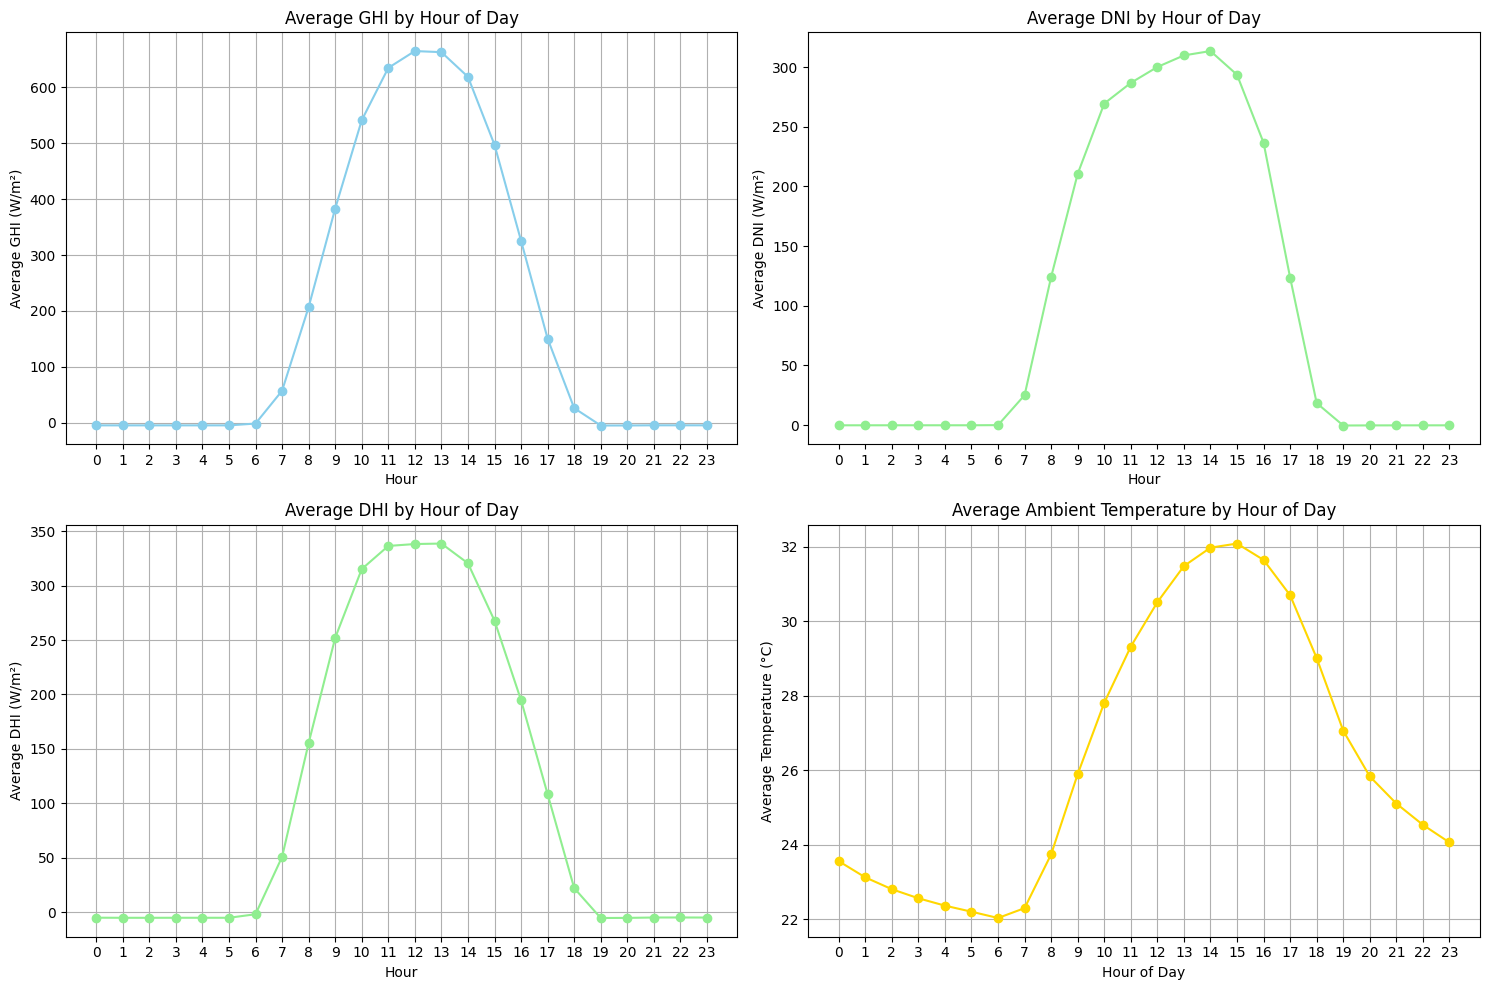

In [56]:
# 3.1 Daily Time Trend
# Extract time features

df1_hourly = df1.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
plt.figure(figsize=(15, 10))

# Plot daily trend for GHI
plt.subplot(2, 2, 1)
df1_hourly['GHI'].plot(kind='line', marker='o', color='skyblue')
plt.ylabel('Average GHI (W/m²)')
plt.title('Average GHI by Hour of Day')
plt.xticks(df1_hourly.index)
plt.grid(True)

# Plot daily trend for 'DNI'
plt.subplot(2, 2, 2)
df1_hourly['DNI'].plot(kind='line', marker='o', color='lightgreen')
plt.ylabel('Average DNI (W/m²)')
plt.title('Average DNI by Hour of Day')
plt.xticks(df1_hourly.index)

plt.subplot(2, 2, 3)
df1_hourly['DHI'].plot(kind='line', marker='o', color='lightgreen')
plt.ylabel('Average DHI (W/m²)')
plt.title('Average DHI by Hour of Day')
plt.xticks(df1_hourly.index)
plt.grid(True)

plt.subplot(2, 2, 4)
df1_hourly['Tamb'].plot(kind='line', marker='o', color='gold')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Ambient Temperature by Hour of Day')
plt.xlabel('Hour of Day')
plt.xticks(df1_hourly.index)

plt.grid(True)
plt.tight_layout()
plt.show()


### 3.2 Monthly Solar Trend Bar Chart 

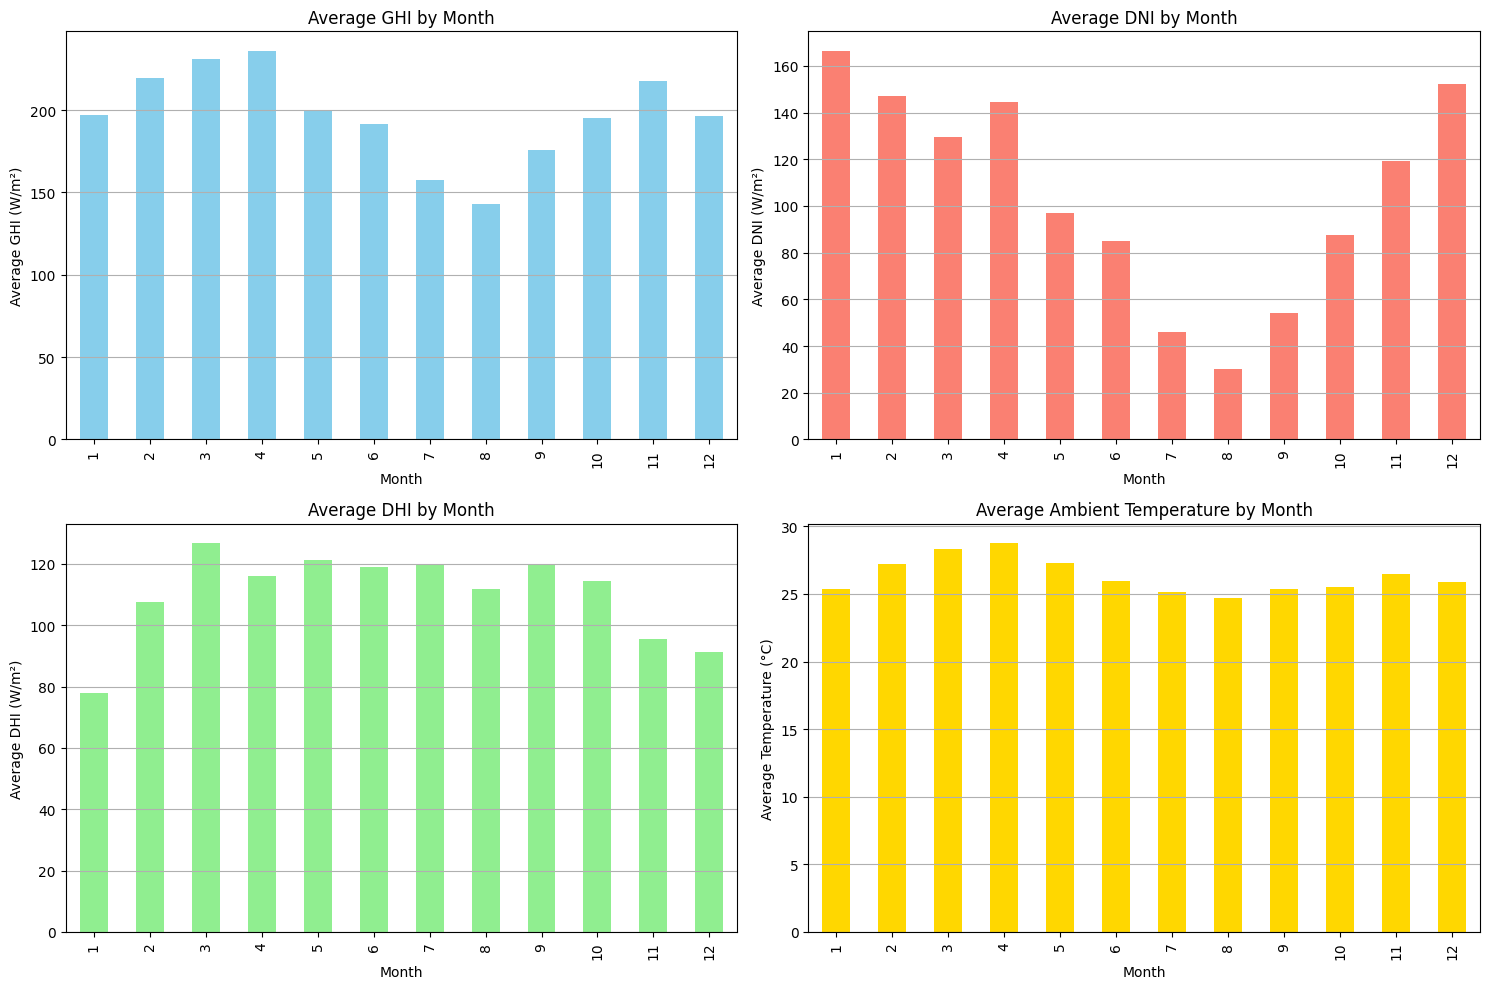

In [61]:
df1_monthly = df1.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
df1_monthly['GHI'].plot(kind='bar', color='skyblue')
plt.ylabel('Average GHI (W/m²)')
plt.title('Average GHI by Month')
plt.grid(axis='y')

plt.subplot(2, 2, 2)
df1_monthly['DNI'].plot(kind='bar', color='salmon')
plt.ylabel('Average DNI (W/m²)')
plt.title('Average DNI by Month')
plt.grid(axis='y')

plt.subplot(2, 2, 3)
df1_monthly['DHI'].plot(kind='bar', color='lightgreen')
plt.ylabel('Average DHI (W/m²)')
plt.title('Average DHI by Month')
plt.grid(axis='y')

plt.subplot(2, 2, 4)
df1_monthly['Tamb'].plot(kind='bar', color='gold')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Ambient Temperature by Month')
plt.xlabel('Month')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### 3.3 Showing Quarterly Trends

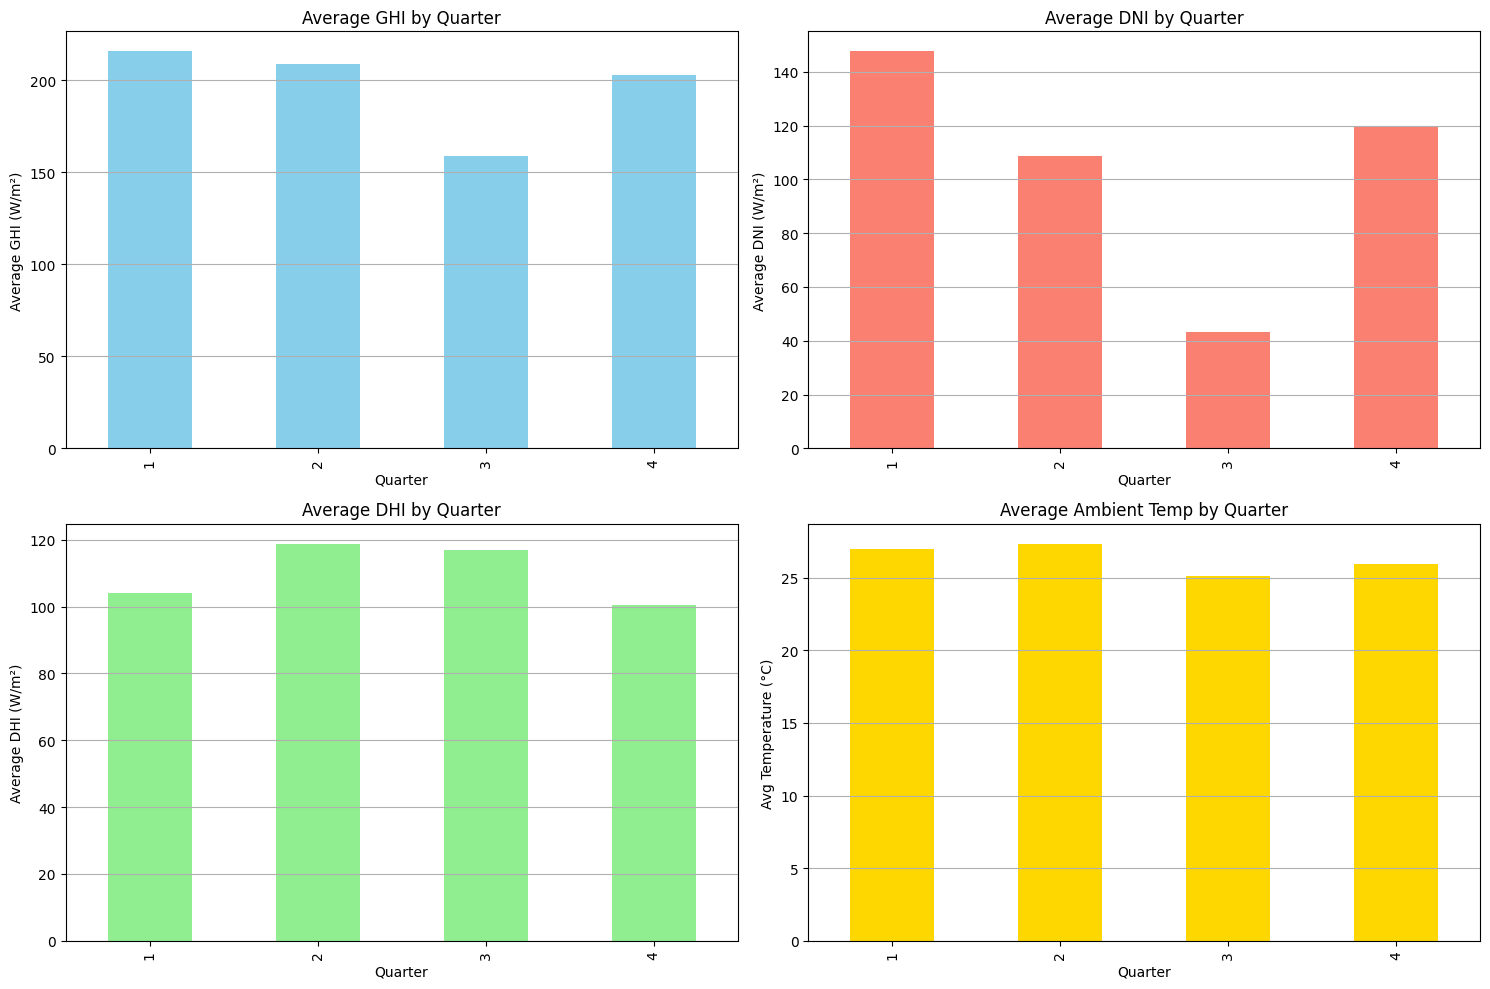

In [62]:
# Step 1: Extract Quarter from datetime index

# Step 2: Group by Quarter and calculate mean
df1_quarterly = df1.groupby('Quarter')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Step 3: Plot (2x2 grid)
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
df1_quarterly['GHI'].plot(kind='bar', color='skyblue')
plt.ylabel('Average GHI (W/m²)')
plt.title('Average GHI by Quarter')
plt.grid(axis='y')

plt.subplot(2, 2, 2)
df1_quarterly['DNI'].plot(kind='bar', color='salmon')
plt.ylabel('Average DNI (W/m²)')
plt.title('Average DNI by Quarter')
plt.grid(axis='y')

plt.subplot(2, 2, 3)
df1_quarterly['DHI'].plot(kind='bar', color='lightgreen')
plt.ylabel('Average DHI (W/m²)')
plt.title('Average DHI by Quarter')
plt.grid(axis='y')

plt.subplot(2, 2, 4)
df1_quarterly['Tamb'].plot(kind='bar', color='gold')
plt.ylabel('Avg Temperature (°C)')
plt.title('Average Ambient Temp by Quarter')
plt.xlabel('Quarter')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### 3.3 Anomalies 
peaks in solar irradiance or temperature fluctuations. 


Anomalies detected (Z-score > 3 or < -3):
GHI anomalies:
                                  GHI  GHI_zscore
1970-01-01 00:00:00.000000663  1119.0    3.072222
1970-01-01 00:00:00.000000671  1154.0    3.189477
1970-01-01 00:00:00.000000780  1111.0    3.045421
1970-01-01 00:00:00.000000781  1126.0    3.095673
1970-01-01 00:00:00.000000782  1151.0    3.179426

DNI anomalies:
                                 DNI  DNI_zscore
1970-01-01 00:00:00.000000699  815.0    3.195133
1970-01-01 00:00:00.000000700  820.0    3.218000
1970-01-01 00:00:00.000000701  830.0    3.263735
1970-01-01 00:00:00.000000702  820.0    3.218000
1970-01-01 00:00:00.000000703  833.0    3.277455

DHI anomalies:
                                 DHI  DHI_zscore
1970-01-01 00:00:00.000000653  594.3    3.023541
1970-01-01 00:00:00.000000654  599.6    3.056886
1970-01-01 00:00:00.000000655  605.9    3.096522
1970-01-01 00:00:00.000000656  603.9    3.083939
1970-01-01 00:00:00.000000657  598.8    3.051853

Tamb anomalies:
     

c:\Users\ssss\Desktop\## 10 Acadamy\Week 0\cross-country-solar-farm-analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


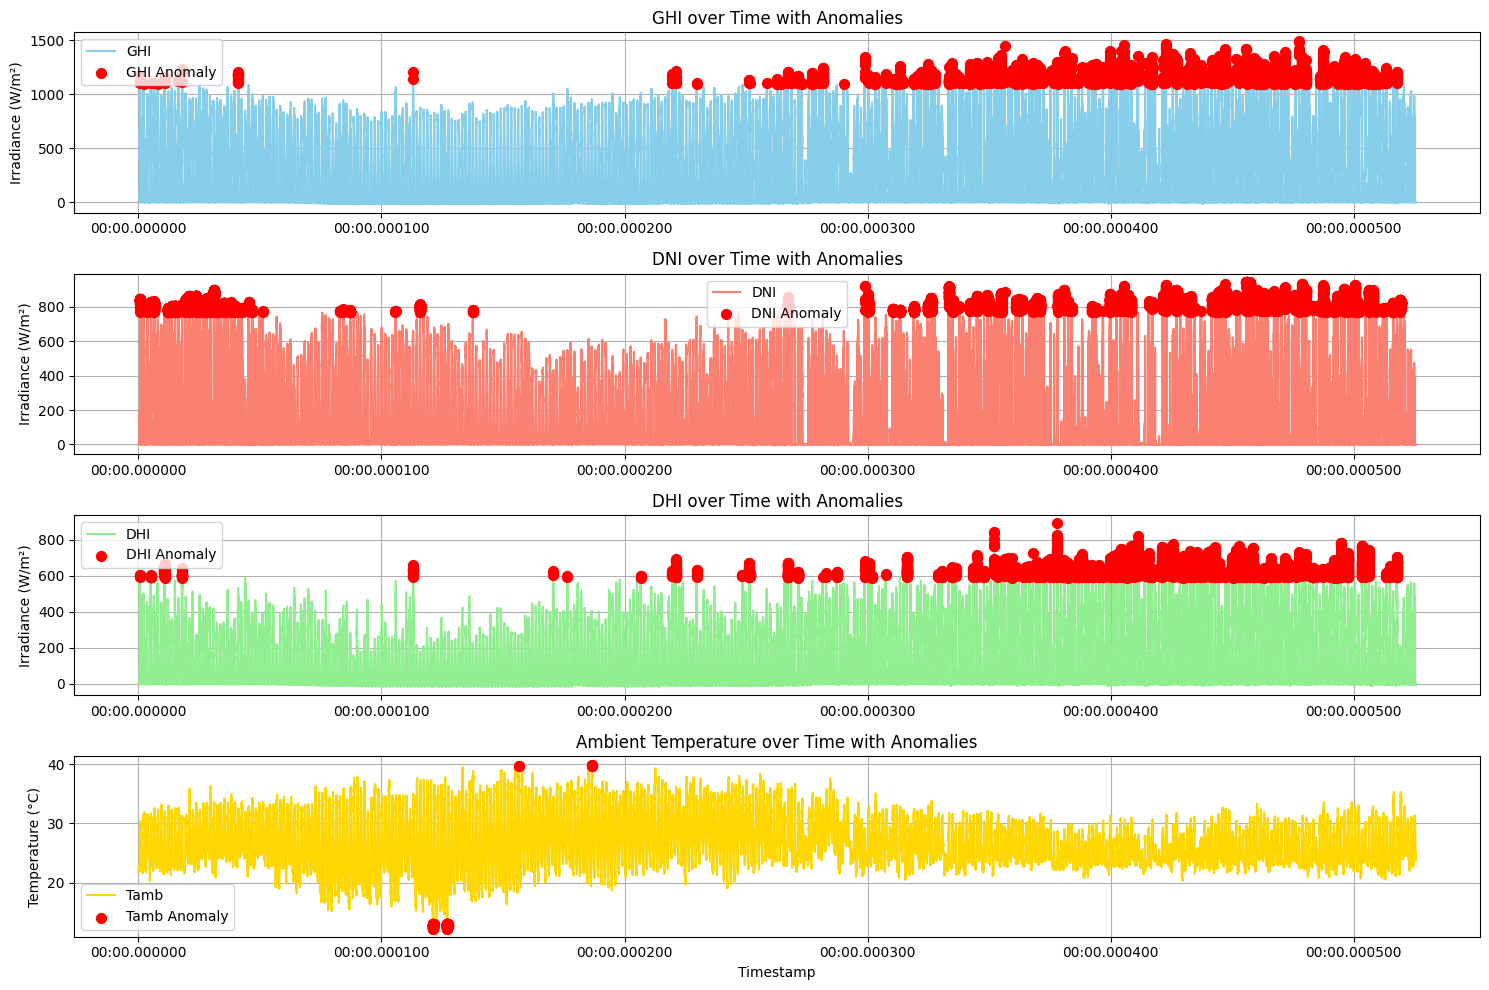

In [63]:
# Trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations.
# Anomalies - Simple Z-score outlier detection
# Calculate Z-scores for relevant columns
df.index = pd.to_datetime(df.index)

df['GHI_zscore'] = zscore(df['GHI'])
df['DNI_zscore'] = zscore(df['DNI'])
df['DHI_zscore'] = zscore(df['DHI'])
df['Tamb_zscore'] = zscore(df['Tamb'])

# Define threshold for anomalies (e.g., Z-score > 3 or < -3)
z_threshold = 3

# Find anomalies
anomalies_ghi = df[abs(df['GHI_zscore']) > z_threshold]
anomalies_dni = df[abs(df['DNI_zscore']) > z_threshold]
anomalies_dhi = df[abs(df['DHI_zscore']) > z_threshold]
anomalies_tamb = df[abs(df['Tamb_zscore']) > z_threshold]

print("\nAnomalies detected (Z-score > {} or < {}):".format(z_threshold, -z_threshold))
print("GHI anomalies:")
print(anomalies_ghi[['GHI', 'GHI_zscore']].head())

print("\nDNI anomalies:")
print(anomalies_dni[['DNI', 'DNI_zscore']].head())

print("\nDHI anomalies:")
print(anomalies_dhi[['DHI', 'DHI_zscore']].head())

print("\nTamb anomalies:")
print(anomalies_tamb[['Tamb', 'Tamb_zscore']].head())

# Optional: Visualize anomalies on the time series plots
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(df.index, df['GHI'], label='GHI', color='skyblue')
plt.scatter(anomalies_ghi.index, anomalies_ghi['GHI'], color='red', label='GHI Anomaly', s=50, zorder=5)
plt.ylabel('Irradiance (W/m²)')
plt.title('GHI over Time with Anomalies')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(df.index, df['DNI'], label='DNI', color='salmon')
plt.scatter(anomalies_dni.index, anomalies_dni['DNI'], color='red', label='DNI Anomaly', s=50, zorder=5)
plt.ylabel('Irradiance (W/m²)')
plt.title('DNI over Time with Anomalies')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(df.index, df['DHI'], label='DHI', color='lightgreen')
plt.scatter(anomalies_dhi.index, anomalies_dhi['DHI'], color='red', label='DHI Anomaly', s=50, zorder=5)
plt.ylabel('Irradiance (W/m²)')
plt.title('DHI over Time with Anomalies')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(df.index, df['Tamb'], label='Tamb', color='gold')
plt.scatter(anomalies_tamb.index, anomalies_tamb['Tamb'], color='red', label='Tamb Anomaly', s=50, zorder=5)
plt.ylabel('Temperature (°C)')
plt.title('Ambient Temperature over Time with Anomalies')
plt.xlabel('Timestamp')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### 3.4 Cleaning Impact

                ModA        ModB
Cleaning                        
0         202.986954  193.639074
1         273.309252  277.231102


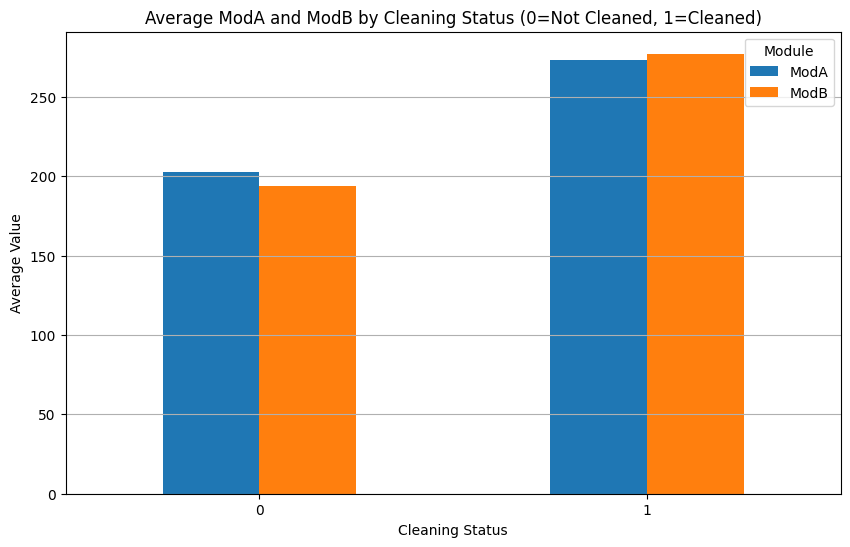

In [64]:
cleaning_grouped = df1.groupby('Cleaning')[['ModA', 'ModB']].mean()
print(cleaning_grouped)

# Plotting the results
cleaning_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Average ModA and ModB by Cleaning Status (0=Not Cleaned, 1=Cleaned)')
plt.xlabel('Cleaning Status')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Module')
plt.show()

### 4. Correlation & Relationship Analysis

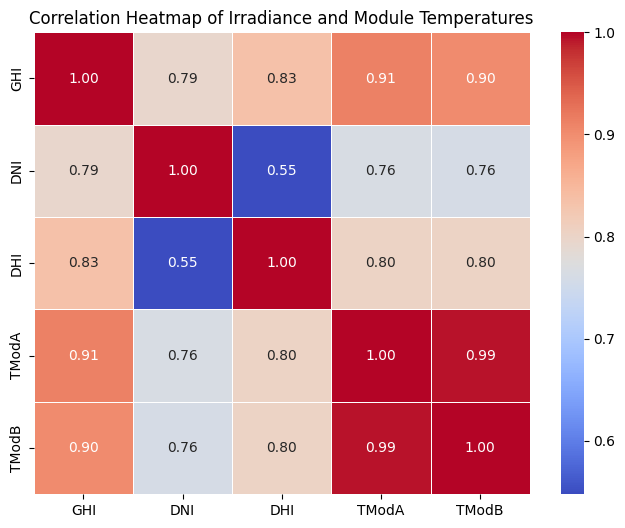

In [65]:
# 4.1  Correlation Analysis - Heatmap
#Heatmap of correlations (GHI, DNI, DHI, TModA, TModB)

# Select the relevant columns for correlation
correlation_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Calculate the correlation matrix
correlation_matrix = df1[correlation_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Irradiance and Module Temperatures')
plt.show()

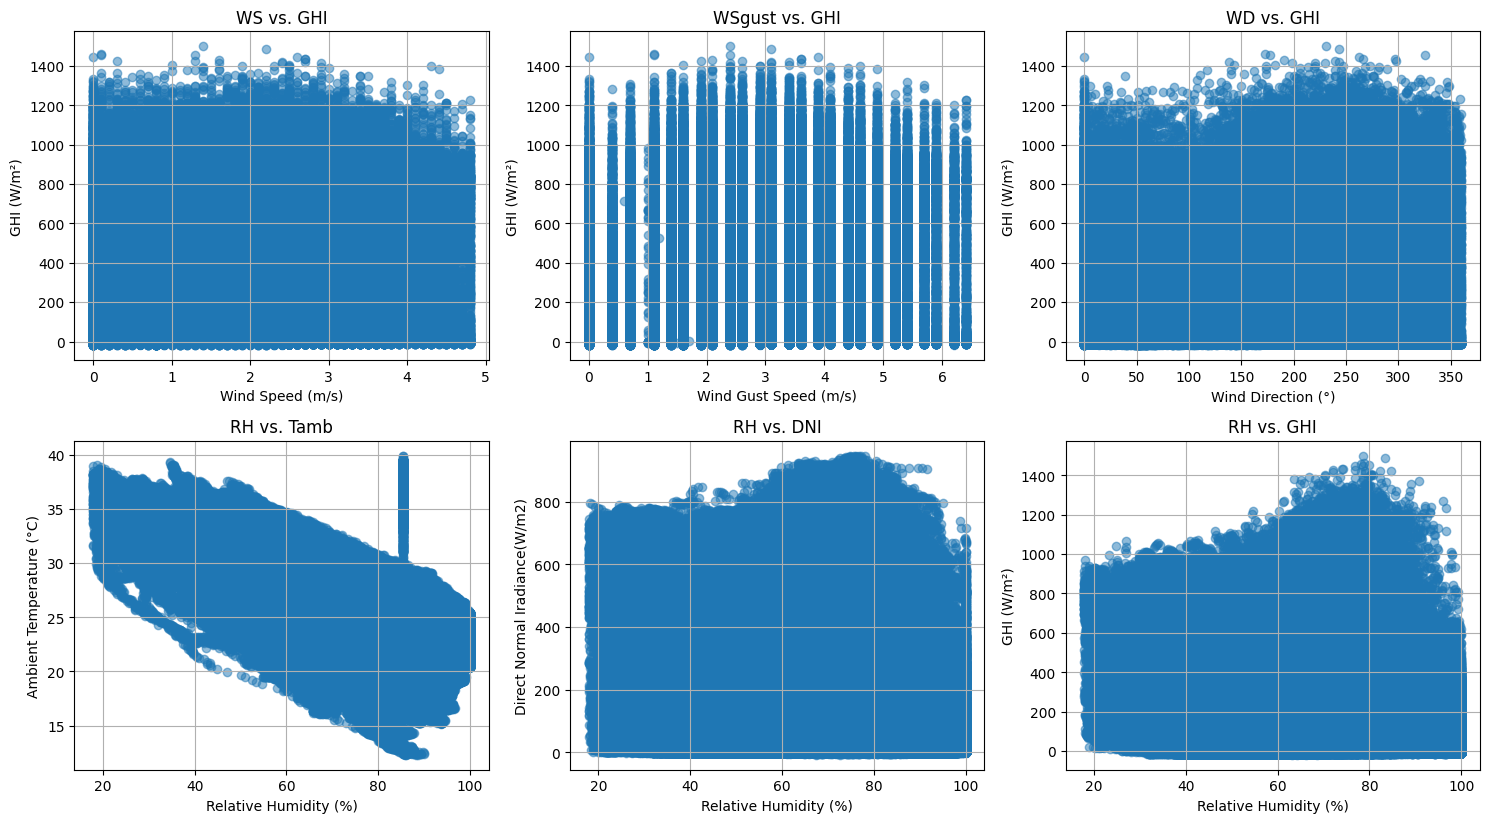

In [66]:
# 4.2 Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

plt.figure(figsize=(15, 12))

# WS vs. GHI
plt.subplot(3, 3, 1)
plt.scatter(df1['WS'], df['GHI'], alpha=0.5)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.title('WS vs. GHI')
plt.grid(True)

# WSgust vs. GHI
plt.subplot(3, 3, 2)
plt.scatter(df1['WSgust'], df['GHI'], alpha=0.5)
plt.xlabel('Wind Gust Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.title('WSgust vs. GHI')
plt.grid(True)

# WD vs. GHI
plt.subplot(3, 3, 3)
plt.scatter(df1['WD'], df['GHI'], alpha=0.5)
plt.xlabel('Wind Direction (°)')
plt.ylabel('GHI (W/m²)')
plt.title('WD vs. GHI')
plt.grid(True)

# RH vs. Tamb
plt.subplot(3, 3, 4)
plt.scatter(df1['RH'], df['Tamb'], alpha=0.5)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('RH vs. Tamb')
plt.grid(True)

# RH vs. GNI
plt.subplot(3, 3, 5)
plt.scatter(df1['RH'], df['DNI'], alpha=0.5)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Direct Normal Iradiance(W/m2)')
plt.title('RH vs. DNI')
plt.grid(True)


plt.subplot(3, 3, 6)
# RH vs. GHI
plt.scatter(df1['RH'], df['GHI'], alpha=0.5)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.title('RH vs. GHI')
plt.grid(True)

plt.tight_layout()
plt.show()

### 5. Wind & Distribution Analysis

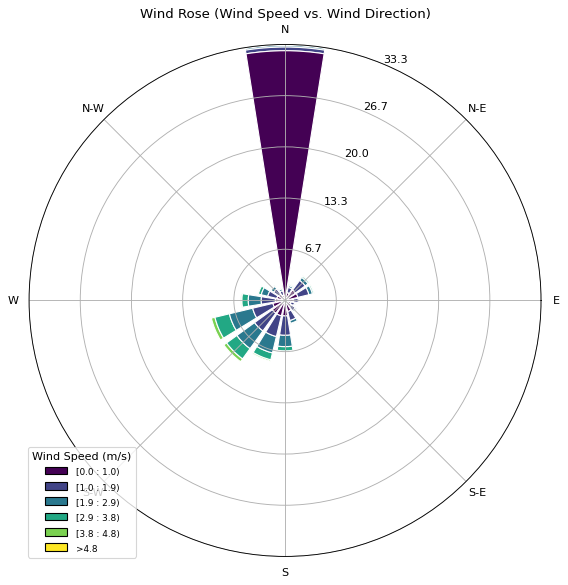

In [68]:
# 5.1 Wind direction plot 
# Ensure 'WS' and 'WD' columns exist
  # Create a WindroseAxes instance
ax = WindroseAxes.from_ax()

  # Plot the wind rose using WS and WD data
ax.bar(df1['WD'], df1['WS'], normed=True, opening=0.8, edgecolor='white')

  # Set the title
ax.set_title('Wind Rose (Wind Speed vs. Wind Direction)')

  # Add a legend
ax.set_legend(title='Wind Speed (m/s)')

  # Display the plot
plt.show()

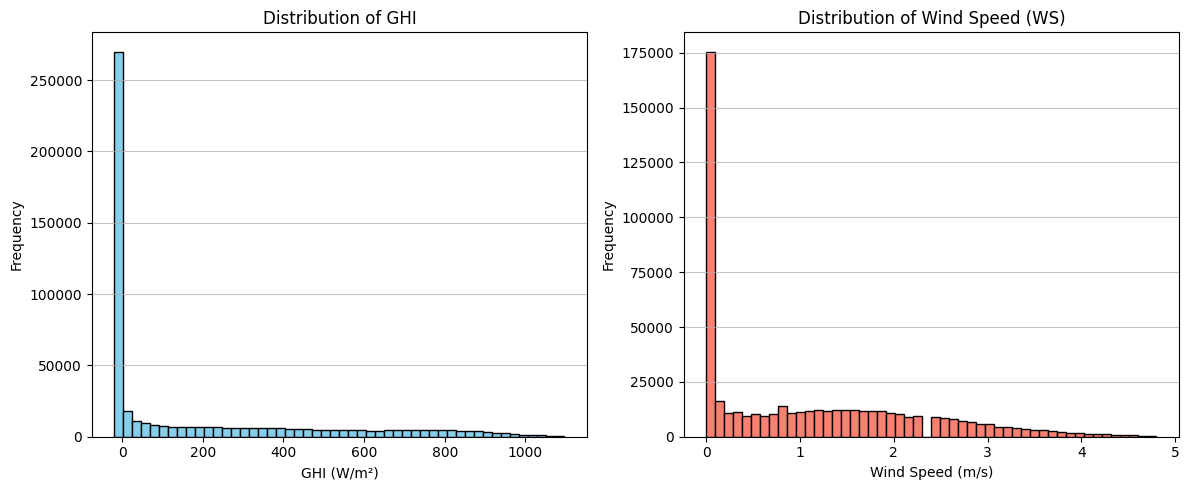

In [69]:
# 5.2 Wind Bar plots
# Histograms for GHI and WS
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df1['GHI'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.title('Distribution of GHI')
plt.grid(axis='y', alpha=0.75)

plt.subplot(1, 2, 2)
plt.hist(df1['WS'], bins=50, color='salmon', edgecolor='black')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Speed (WS)')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

### 6. Temperature Analysis


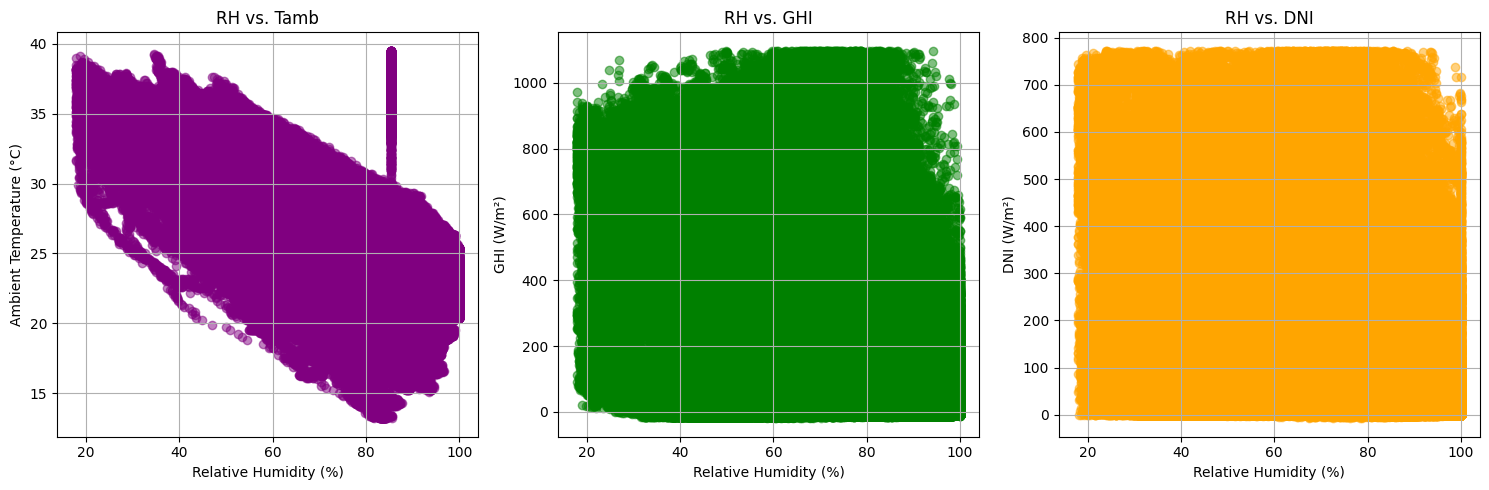


Correlation of Relative Humidity with other variables:
RH      1.000000
Tamb   -0.791937
GHI    -0.546677
DNI    -0.548800
DHI    -0.431910
Name: RH, dtype: float64


In [70]:
# Examine how relative humidity (RH) might influence temperature readings and solar radiation

# Analyze the relationship between RH and Temperature (Tamb) and Solar Radiation (GHI, DNI, DHI)
plt.figure(figsize=(15, 5))

# RH vs. Tamb
plt.subplot(1, 3, 1)
plt.scatter(df1['RH'], df1['Tamb'], alpha=0.5, color='purple')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('RH vs. Tamb')
plt.grid(True)

# RH vs. GHI
plt.subplot(1, 3, 2)
plt.scatter(df1['RH'], df1['GHI'], alpha=0.5, color='green')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.title('RH vs. GHI')
plt.grid(True)

# RH vs. DNI
plt.subplot(1, 3, 3)
plt.scatter(df1['RH'], df1['DNI'], alpha=0.5, color='orange')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DNI (W/m²)')
plt.title('RH vs. DNI')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate and print correlations between RH and other variables
print("\nCorrelation of Relative Humidity with other variables:")
print(df[['RH', 'Tamb', 'GHI', 'DNI', 'DHI']].corr()['RH'])

### 7. Bubble Chart

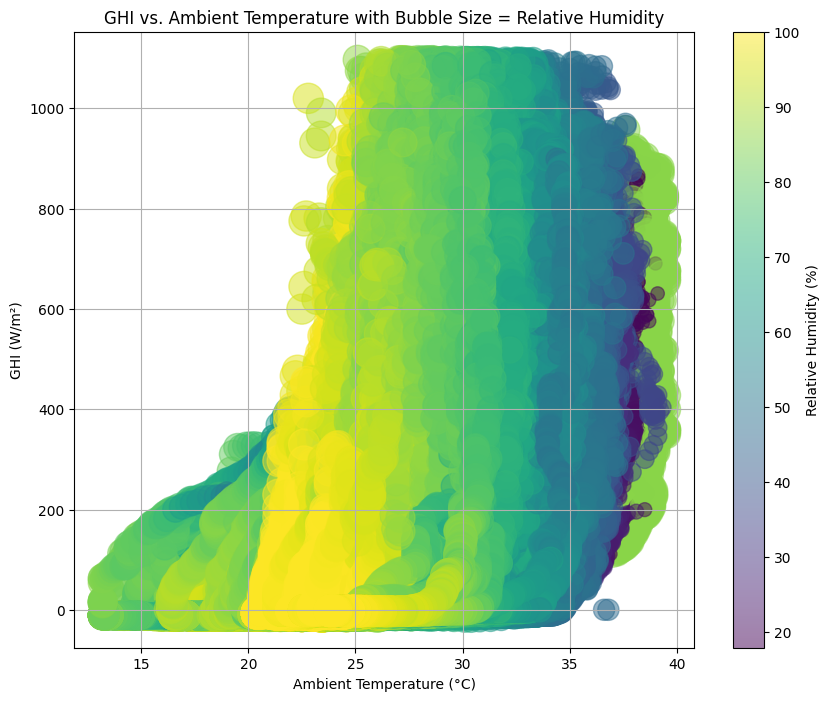

In [71]:
# GHI vs. Tamb with bubble size = RH 
plt.figure(figsize=(10, 8))  
plt.scatter(df1['Tamb'], df1['GHI'], s=df1['RH']*5, alpha=0.5, c=df1['RH'], cmap='viridis')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs. Ambient Temperature with Bubble Size = Relative Humidity')
plt.colorbar(label='Relative Humidity (%)')
plt.grid(True)
plt.show()
plt.show()